In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def generate_league_data(x):
    url = x
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    pre_df = dict()
    features_wanted =  {"team" , "games","wins","draws","losses", "goals_for","goals_against", "points", "xg_for","xg_against","xg_diff","attendance","xg_diff_per90", "last_5"} #add more features here!!
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    df["games"] = pd.to_numeric(df["games"])
    df["xg_diff_per90"] = pd.to_numeric(df["xg_diff_per90"])
    df["minutes_played"] = df["games"] *90
    return(df)

In [3]:
df = generate_league_data("https://fbref.com/en/comps/9/Premier-League-Stats")

In [4]:
df['xg_diff'] = pd. to_numeric(df['xg_diff'])
data = df[["team","xg_diff","xg_for","xg_against"]]
data = data.sort_values(by="xg_diff").reset_index(drop=True)
data

,team,xg_diff,xg_for,xg_against
0,Ipswich Town,-14.1,10.1,24.2
1,Southampton,-10.6,11.9,22.4
2,Leicester City,-9.0,11.1,20.0
3,Wolves,-8.3,11.5,19.8
4,Everton,-4.0,11.9,16.0
5,West Ham,-3.4,15.1,18.4
6,Crystal Palace,-2.4,13.8,16.1
7,Brighton,-1.9,16.4,18.4
8,Brentford,-1.1,18.2,19.3
9,Manchester Utd,0.6,17.4,16.7


In [5]:
fm_ids = pd.read_csv("CSVs/Top6_leagues_fotmob_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

data = data.merge(fm_ids, on='team', how='left')
data

,team,xg_diff,xg_for,xg_against,team_id
0,Ipswich Town,-14.1,10.1,24.2,9902
1,Southampton,-10.6,11.9,22.4,8466
2,Leicester City,-9.0,11.1,20.0,8197
3,Wolves,-8.3,11.5,19.8,8602
4,Everton,-4.0,11.9,16.0,8668
5,West Ham,-3.4,15.1,18.4,8654
6,Crystal Palace,-2.4,13.8,16.1,9826
7,Brighton,-1.9,16.4,18.4,10204
8,Brentford,-1.1,18.2,19.3,9937
9,Manchester Utd,0.6,17.4,16.7,10260


In [6]:
style.use('fivethirtyeight')

In [7]:
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [8]:
def add_logo_on_ax(ax, team_id, bw = False):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

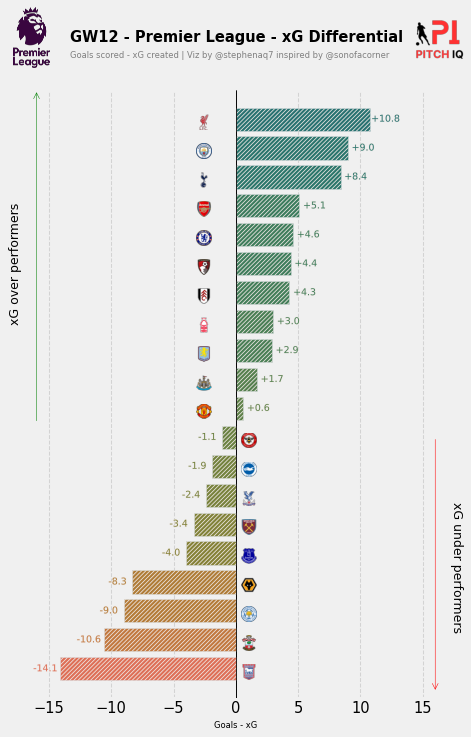

In [10]:
from PIL import Image
import matplotlib.image as image

style.use('fivethirtyeight')
fig = plt.figure(figsize=(7,10), dpi=75)
fig.patch.set_facecolor('#f0f0f0')  # Set figure background color
ax.set_facecolor('#f0f0f0')  # Set axes background color to match
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['xg_diff'].min()), data['xg_diff'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.3)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlabel('Goals - xG', size=8)
# -- Bar Chart -------------------------------------
ax.barh(
    data.index, data['xg_diff'],
    hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
norm = mcolors.Normalize(vmin=data['xg_diff'].min(),vmax=data['xg_diff'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['xg_diff'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['xg_diff'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for index, x in enumerate(data['xg_diff']):
    if x < 0:
        sign_offset = -1.8
        offset_logo = .25
        sign_text = ''
    else:
        sign_offset = 1.8
        offset_logo = 1.8
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*8,0),
        text=f'{sign_text}{x:.1f}',
        weight='normal',
        ha='center',
        va='center',
        color= cmap(norm(x)),
        size=9,
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=1, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    team_id = data['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, False)
    # print(x)

# -- Figure title and arrows --------------------------------
position_negative = data[data['xg_diff'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='green')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='red')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='xG over performers',
    rotation=90,
    xytext=(-20,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='xG under performers',
    rotation=-90,
    xytext=(20,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.2, y = .94, 
    s = 'GW12 - Premier League - xG Differential',
    va = 'bottom', ha = 'left',
    fontsize = 14, color = 'black', font = 'Sans', weight = 'bold'
)

fig_text(
    x = 0.2, y = 0.92, 
    s = 'Goals scored - xG created | Viz by @stephenaq7 inspired by @sonofacorner',
    va = 'bottom', ha = 'left',
    fontsize = 8, color = 'gray'
)

ax2 = fig.add_axes([0.09, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


plt.savefig(
    "outputs/epl_08242022.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    edgecolor="none"
)

plt.savefig(
    "outputs/epl_08242022_tr.png",
    dpi = 600,
    facecolor = "none",
    edgecolor="none"
)


In [21]:
team_id_list = team_id
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png")).convert('LA')

In [11]:
def p90_Calculator(variable_value, minutes_played):
    
    variable_value = pd.to_numeric(variable_value)
    
    ninety_minute_periods = minutes_played/90
    
    p90_value = variable_value/ninety_minute_periods
    
    return p90_value

def form_ppg_calc(variable_value):
    wins = variable_value.count("W")
    draws = variable_value.count("D")
    losses = variable_value.count("L")
    points = (wins*3) + (draws)
    # ppg = points/3
    ppg = points/5
    return ppg

In [12]:
df['xG_p90'] = df.apply(lambda x: p90_Calculator(x['xg_for'], x['minutes_played']), axis=1)
df['xGA_p90'] = df.apply(lambda x: p90_Calculator(x['xg_against'], x['minutes_played']), axis=1)
df['ppg_form'] = df.apply(lambda x: form_ppg_calc(x['last_5']), axis=1)

In [13]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [14]:
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

df = df.merge(fm_ids, on='team', how='left')
clubs = list(df.team_id.unique())
clubs

[9825,
 8456,
 10261,
 10260,
 8586,
 10204,
 9879,
 9937,
 8650,
 8455,
 10252,
 9826,
 10203,
 8197,
 8463,
 8654,
 8602,
 8678,
 8668,
 8466]

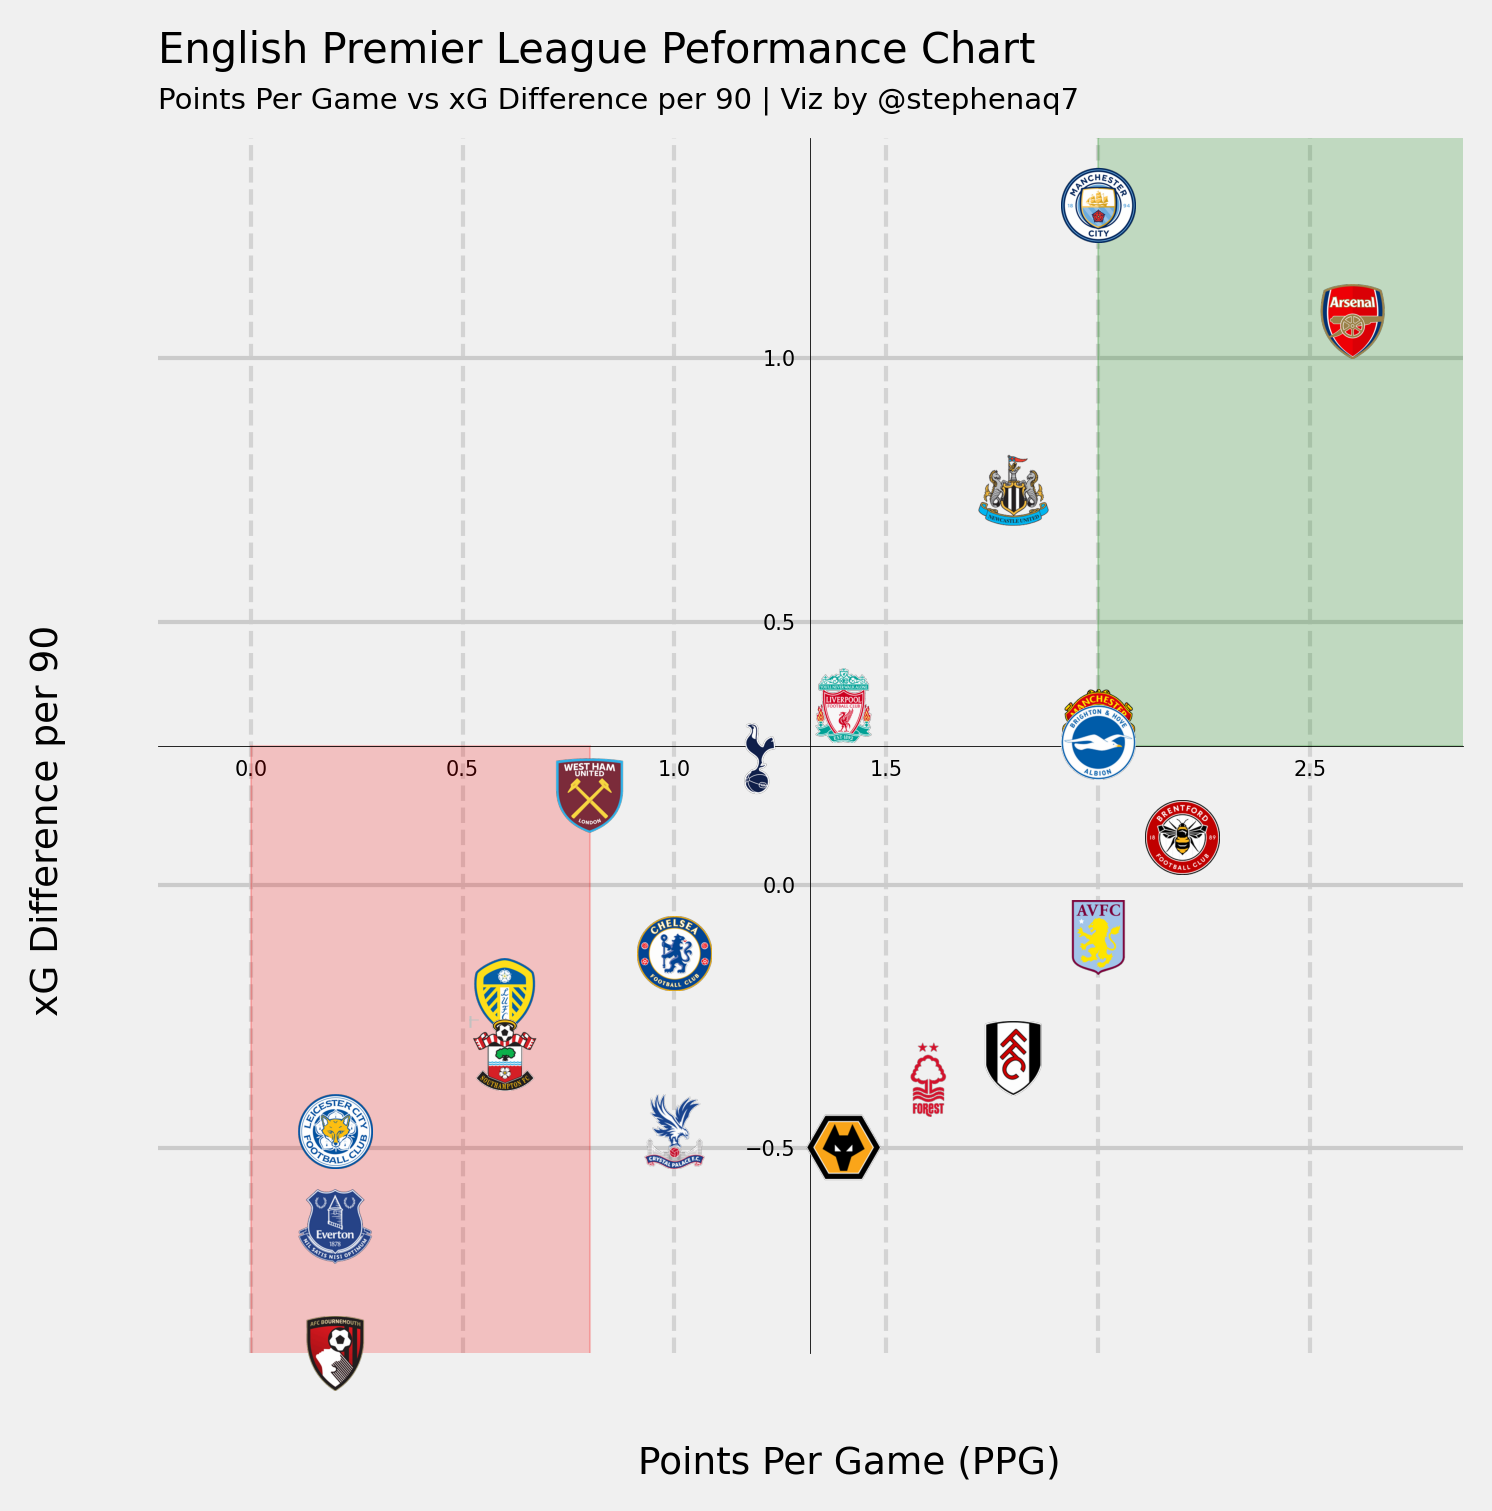

In [15]:
style.use('fivethirtyeight')
x_loc = df["ppg_form"]
y_loc = df['xg_diff_per90']

bgcol = '#fafafa'

fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()


ax.set_xlim(x_loc.min()*-1.1,x_loc.max()*1.1)
ax.set_ylim(y_loc.min(),y_loc.max()*1.1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)

    counter += 1

# Change ticks
ax.tick_params(axis='both', which='major', labelsize=5)


plt.grid(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')

ax.spines['left'].set_position('center')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.2)

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# Add average lines
plt.hlines(df['xg_diff_per90'].mean(), 0, 3, color='#c2c1c0')
plt.vlines(df['ppg_form'].mean(), df['xg_diff_per90'].min(), df['xg_diff_per90'].max(), color='#c2c1c0')
ax.axvspan(2.0, 3.3, ymin=0.5, ymax=1.5, alpha=0.2, color='green',label= "Title's on")

ax.axvspan(0.0, 0.8, alpha=0.2, ymin=0.5, ymax=-0.5,color='red',label= "Oh Dear")


## Title & comment
fig.text(.08,.90,'Points Per Game vs xG Difference per 90 | Viz by @stephenaq7',size=7)
fig.text(.08,.93,'English Premier League Peformance Chart',size=10)

## Avg line explanation
fig.text(-0.005,0.3,'xG Difference per 90', size=9, color='k',rotation=90)
fig.text(.4,-0.01,'Points Per Game (PPG)', size=9, color='k')


## Save plot
plt.savefig('xGChart.png', dpi=1200)



In [ ]:
# #%%
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import matplotlib.ticker as ticker
# from matplotlib import rcParams
# import numpy as np
# from highlight_text import fig_text
# import pandas as pd

# from PIL import Image
# import urllib
# import os

# # --- Use this only if you have already downloaded fonts into your
# # --- local directory.

# # Add pretty fonts

# font_path = r"" #Set the path to where the fonts are located

# for x in os.listdir(font_path):
#     for y in os.listdir(f"{font_path}/{x}"):
#         if y.split(".")[-1] == "ttf":
#             fm.fontManager.addfont(f"{font_path}/{x}/{y}")
#             try:
#                 fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
#             except Exception as e:
#                 print(f"Font {y} could not be added.")
#                 continue

# rcParams['font.family'] = 'Karla'

# # --- Reading the data

# df = pd.read_csv("data/06202022_bundesliga.csv", index_col = 0)
# df = (
#         df
#         .sort_values(by = ["variable", "value"], ascending = True)
#         .reset_index(drop = True)
# )


# fig = plt.figure(figsize=(6.5, 10), dpi = 200, facecolor="#EFE9E6")
# ax = plt.subplot(111, facecolor = "#EFE9E6")

# # Adjust spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# ax.grid(True, color = "lightgrey", ls = ":")

# # Define the series
# teams = list(df["team_id"].unique())
# Y = np.arange(len(teams))
# X_xg = df[df["variable"] == "xG_ag"]["value"]
# X_goals = df[df["variable"] == "score_ag"]["value"]

# # Fix axes limits
# ax.set_ylim(-.5, len(teams) - .5)
# ax.set_xlim(
#     min(X_goals.min(), X_xg.min(), 30), 
#     max(X_goals.max(), X_xg.max(), 90)
# )

# # Scatter plots
# ax.scatter(X_xg, Y, color = "#74959A", s = 150, alpha = 0.35, zorder = 3)
# ax.scatter(X_goals, Y, color = "#495371", s = 150, alpha = 0.35, zorder = 3)
# ax.scatter(X_xg, Y, color = "none", ec = "#74959A", s = 180, lw = 2.5, zorder = 3)
# ax.scatter(X_goals, Y, color = "none", ec = "#495371", s = 180, lw = 2.5, zorder = 3)


# # Add line chart between points and difference annotation
# for index in Y:
#     difference = X_xg.iloc[index] - X_goals.iloc[index]
#     if difference > 0:
#         color = "#74959A" 
#         x_adj = -1.75
#         anot_position = X_xg.iloc[index]
#         anot_aux_sign = "-"
#     else:
#         color = "#495371"
#         x_adj = 1.75
#         anot_position = X_goals.iloc[index]
#         anot_aux_sign = "+"
    
#     ax.annotate(
#         xy = (anot_position, index),
#         text = f"{anot_aux_sign} {abs(difference):.1f}",
#         xytext = (13, -2),
#         textcoords = "offset points",
#         size = 8,
#         color = color,
#         weight = "bold"
#     )
    
#     if abs(difference) < 3.5:
#         continue
#     ax.plot(
#         [X_xg.iloc[index] + x_adj, X_goals.iloc[index] + x_adj*(-1)],
#         [index, index],
#         lw = 2.5,
#         color = color,
#         zorder = 2
#     )

# DC_to_FC = ax.transData.transform
# FC_to_NFC = fig.transFigure.inverted().transform

# # Native data to normalized data coordinates
# DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
# for index, team_id in enumerate(teams):
#     ax_coords = DC_to_NFC([25, index - 0.55])
#     logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.045, 0.045], anchor = "C")
#     club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
#     logo_ax.imshow(club_icon)
#     logo_ax.axis("off")


# # Remove tick labels
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# false_ticks = ax.set_yticklabels([])

# fig_text(
#     x = 0.15, y = .9, 
#     s = "During the 21/22 season almost every Bundesliga\nside <outperformed> their <xG conceded>",
#     highlight_textprops = [
#         {"color": "#495371"},
#         {"color":"#74959A"}
#     ],
#     va = "bottom", ha = "left",
#     fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
# )
# fig_text(
# 	x = 0.15, y = .885, 
#     s = "German Bundesliga | 2021 - 2022 season | viz by @sonofacorner",
# 	va = "bottom", ha = "left",
# 	fontsize = 8, color = "#4E616C", font = "Karla"
# )

# # # ---- The League's logo
# league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/54.png"))
# league_ax = fig.add_axes([0.055, 0.89, 0.065, 0.065], zorder=1)
# league_ax.imshow(league_icon)
# league_ax.axis("off")

# plt.savefig(
# 	"figures/06202022_bundelsiga_xg.png",
# 	dpi = 500,
# 	facecolor = "#EFE9E6",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = False
# )

# plt.savefig(
# 	"figures/06202022_bundelsiga_xg_tr.png",
# 	dpi = 500,
# 	facecolor = "none",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = True
# )


In [ ]:
# next visual to add
# Base notebook 
# https://github.com/sonofacorner/soc-viz-of-the-week/blob/main/09192022/09192022.ipynb

In [ ]:
# next visual to add 
# Base Notebook 
# https://github.com/sonofacorner/soc-viz-of-the-week/blob/main/10032022/10032022.ipynb

In [ ]:
# premier league sharp shooters 
# Base Notebook
# https://github.com/sonofacorner/soc-viz-of-the-week/blob/main/01092023/01092023.ipynb